In this example i build a complete Neural Network from scratch
We need a loos function (CrossEntropy - Classes or MSQE-Mean Squared Error for Regression)
We need to build an input and an output layer
(Perceptron Network)
An activation function like sigmoid or ReLu/logsoftmax

In [1]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [2]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

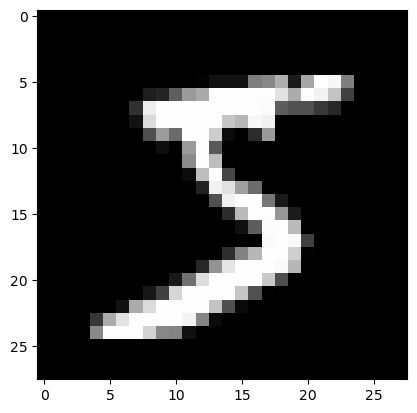

(50000, 784)


In [3]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
# ``pyplot.show()`` only if not on Colab
try:
    import google.colab
except ImportError:
    pyplot.show()
print(x_train.shape)

In [4]:
import torch

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


In [5]:
x_train.size()

torch.Size([50000, 784])

In [6]:
import math
import torch

In [7]:
#Create weights/bias and initialize them with 
#Xavier initialisation http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
weights : torch.Tensor = torch.rand(784, 10) / math.sqrt(784)
weights.requires_grad_()
bias = torch.zeros(10, requires_grad=True)

In [8]:
#definition der Bewertungsfunktion
def log_softmax(x : torch.Tensor) -> torch.Tensor:
    # print(f'x-shape {x.shape}')
    # expression = x.exp()
    # print('expresion shape', expression.shape)
    # expression = expression.sum(-1)
    # print(expression.shape)
    # expression = expression.log()
    # print(expression.shape)
    # expression = expression.unsqueeze(-1)
    # print(expression.shape)
    # return x - expression
    return x - x.exp().sum(-1).log().unsqueeze(-1)

def softmax(x):
    return x.exp()/torch.sum(torch.exp(x), dim=1).unsqueeze(-1)

def model(xb):
    return log_softmax(xb @ weights + bias)

x = torch.rand(12,10)
#print(x)
log_soft = log_softmax(x)
print(f'Log {log_soft}')
print(f'Summe log {log_soft.sum(1)}')

Log tensor([[-2.5854, -1.8857, -1.9407, -2.8117, -2.0255, -2.8579, -2.8202, -1.9138,
         -2.4444, -2.4535],
        [-2.3842, -2.4739, -2.3418, -2.5431, -2.1208, -2.0251, -2.2422, -2.3750,
         -2.5857, -2.1013],
        [-2.7516, -2.0956, -1.8875, -2.7416, -1.9939, -2.4686, -2.3567, -2.1680,
         -2.6766, -2.3181],
        [-2.2515, -2.0757, -2.3320, -2.0842, -2.2402, -2.4355, -2.7682, -2.6101,
         -2.0271, -2.4562],
        [-2.3231, -2.3903, -1.9813, -2.3035, -2.4875, -2.7573, -2.7470, -1.9904,
         -2.0351, -2.3579],
        [-2.8035, -2.3437, -2.1447, -2.1506, -2.0150, -1.9429, -2.6696, -2.4856,
         -2.1299, -2.7824],
        [-2.2182, -2.6286, -2.4391, -2.0033, -2.7276, -2.7363, -2.0623, -2.2512,
         -2.3524, -1.9724],
        [-2.1521, -1.9444, -2.5156, -2.6684, -1.8557, -2.3603, -2.5422, -1.9784,
         -2.7901, -2.7907],
        [-2.4665, -2.5914, -2.5962, -1.9755, -2.0008, -2.1326, -2.2284, -2.6000,
         -2.6483, -2.1164],
        [-2.339

In [9]:
x = torch.rand(12,10)
#print(x)
log_soft = log_softmax(x)
print(f'Log {log_soft}')
print(f'Summe log {log_soft.sum(1)}')

soft = softmax(x)
print(f'Log {soft}')
print(f'Summe soft{soft.sum(1)}')




Log tensor([[-2.4959, -2.4000, -2.2851, -2.2124, -2.1700, -2.7062, -2.5137, -2.6635,
         -2.1566, -1.7820],
        [-2.0990, -2.1209, -2.0489, -2.4197, -2.5525, -2.2724, -2.1879, -2.6996,
         -2.6485, -2.2202],
        [-2.5756, -2.3211, -2.6271, -2.1411, -2.3810, -2.4549, -1.8859, -2.5093,
         -2.2611, -2.1175],
        [-2.6242, -2.2074, -2.5096, -2.2337, -2.0993, -2.0061, -2.0261, -2.5478,
         -2.7361, -2.3322],
        [-2.2126, -2.0743, -2.6152, -2.9077, -2.1432, -2.5079, -2.3579, -2.0639,
         -2.5739, -1.9615],
        [-2.9458, -2.6063, -2.0223, -1.9717, -1.9912, -2.4055, -2.5449, -2.0186,
         -2.3536, -2.6744],
        [-2.5352, -2.0811, -2.7037, -2.6960, -2.6683, -2.5360, -2.0282, -1.8548,
         -1.9503, -2.4926],
        [-2.0279, -2.0218, -2.4747, -2.8916, -2.1921, -2.2919, -2.3825, -2.2551,
         -2.1394, -2.6788],
        [-2.5711, -2.4956, -2.5084, -1.9011, -2.0458, -2.5458, -2.1748, -2.1833,
         -2.5445, -2.3248],
        [-2.018

In [10]:
from torch.nn import LogSoftmax
logmax : LogSoftmax = LogSoftmax(dim=1)
logmax(x)

tensor([[-2.4959, -2.4000, -2.2851, -2.2124, -2.1700, -2.7062, -2.5137, -2.6635,
         -2.1566, -1.7820],
        [-2.0990, -2.1209, -2.0489, -2.4197, -2.5525, -2.2724, -2.1879, -2.6996,
         -2.6485, -2.2202],
        [-2.5756, -2.3211, -2.6271, -2.1411, -2.3810, -2.4549, -1.8859, -2.5093,
         -2.2611, -2.1175],
        [-2.6242, -2.2074, -2.5096, -2.2337, -2.0993, -2.0061, -2.0261, -2.5478,
         -2.7361, -2.3322],
        [-2.2126, -2.0743, -2.6152, -2.9077, -2.1432, -2.5079, -2.3579, -2.0639,
         -2.5739, -1.9615],
        [-2.9458, -2.6063, -2.0223, -1.9717, -1.9912, -2.4055, -2.5449, -2.0186,
         -2.3536, -2.6744],
        [-2.5352, -2.0811, -2.7037, -2.6960, -2.6683, -2.5360, -2.0282, -1.8548,
         -1.9503, -2.4926],
        [-2.0279, -2.0218, -2.4747, -2.8916, -2.1921, -2.2919, -2.3825, -2.2551,
         -2.1394, -2.6788],
        [-2.5711, -2.4956, -2.5084, -1.9011, -2.0458, -2.5458, -2.1748, -2.1833,
         -2.5445, -2.3248],
        [-2.0186, -

In [11]:
bs = 64

xb = x_train[0:bs]
print(xb.shape)
preds = model(xb)


torch.Size([64, 784])


In [12]:
preds.sum(1)

tensor([-23.0535, -23.0417, -23.0601, -23.0436, -23.0756, -23.0847, -23.0420,
        -23.0548, -23.0412, -23.0379, -23.0427, -23.0579, -23.0786, -23.0653,
        -23.0435, -23.0607, -23.0638, -23.0541, -23.0319, -23.0437, -23.0561,
        -23.0637, -23.0343, -23.0440, -23.0494, -23.0642, -23.0438, -23.0847,
        -23.0815, -23.0511, -23.0618, -23.0512, -23.0585, -23.0476, -23.0668,
        -23.0631, -23.0633, -23.0734, -23.0562, -23.0549, -23.0447, -23.0458,
        -23.0393, -23.0416, -23.0670, -23.0438, -23.0422, -23.0431, -23.0468,
        -23.0687, -23.0498, -23.0729, -23.0553, -23.0531, -23.0617, -23.0480,
        -23.0756, -23.0322, -23.0625, -23.0475, -23.0739, -23.0429, -23.0635,
        -23.0744], grad_fn=<SumBackward1>)

In [13]:
preds[0], preds.shape
print(preds[0], preds.shape)


tensor([-2.2513, -2.4630, -2.3101, -2.2636, -2.3227, -2.3043, -2.3617, -2.2854,
        -2.3325, -2.1590], grad_fn=<SelectBackward0>) torch.Size([64, 10])


In [14]:
def nll(input : torch.Tensor, target : torch.Tensor):
    #print(f'input preds: {input.shape}')
    #print(f'target y: {target.shape}')

    return -input[range(target.shape[0]), target].mean()

In [15]:
loss_func = nll

In [16]:
yb = y_train[0:bs]
print(f'yb {yb.shape}')
print(loss_func(preds, yb))

yb torch.Size([64])
tensor(2.2812, grad_fn=<NegBackward0>)


In [17]:
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [18]:
preds[range(yb.shape[0]), yb]

tensor([-2.3043, -2.2763, -2.4011, -2.2813, -2.3929, -2.2818, -2.3368, -2.3649,
        -2.2935, -2.2782, -2.3099, -2.3828, -2.1818, -2.2027, -2.2802, -2.2897,
        -2.1642, -2.2350, -2.2210, -2.2137, -2.4148, -2.2401, -2.2960, -2.2812,
        -2.2519, -2.1924, -2.2819, -2.2472, -2.3766, -2.2728, -2.3176, -2.2728,
        -2.1593, -2.2218, -2.3077, -2.3576, -2.1381, -2.3674, -2.2092, -2.1815,
        -2.2264, -2.3624, -2.2719, -2.2570, -2.2361, -2.3211, -2.2679, -2.3977,
        -2.3129, -2.2875, -2.2171, -2.2437, -2.2353, -2.4483, -2.2272, -2.3593,
        -2.2194, -2.2848, -2.4008, -2.2663, -2.3244, -2.4065, -2.1168, -2.2249],
       grad_fn=<IndexBackward0>)

In [19]:
preds[ range(yb.shape[0]),[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0]]

tensor([-2.3043, -2.2763, -2.4011, -2.2813, -2.3929, -2.2818, -2.3368, -2.3649,
        -2.2935, -2.2782, -2.3099, -2.3828, -2.1818, -2.2027, -2.2802, -2.2897,
        -2.1642, -2.2350, -2.2210, -2.2137, -2.4148, -2.2401, -2.2960, -2.2812,
        -2.2519, -2.1924, -2.2819, -2.2472, -2.3766, -2.2728, -2.3176, -2.2728,
        -2.1593, -2.2218, -2.3077, -2.3576, -2.1381, -2.3674, -2.2092, -2.1815,
        -2.2264, -2.3624, -2.2719, -2.2570, -2.2361, -2.3211, -2.2679, -2.3977,
        -2.3129, -2.2875, -2.2171, -2.2437, -2.2353, -2.4483, -2.2272, -2.3593,
        -2.2194, -2.2848, -2.4008, -2.2663, -2.3244, -2.4065, -2.1168, -2.2249],
       grad_fn=<IndexBackward0>)

In [20]:
yb

tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1,
        1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5,
        9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0])

In [21]:
test = torch.rand(4,4)
print(test)
test[range(4),[[1],[2]]]

tensor([[0.9423, 0.8737, 0.8712, 0.5882],
        [0.7487, 0.3365, 0.4444, 0.9984],
        [0.9156, 0.0024, 0.6533, 0.7923],
        [0.7363, 0.9118, 0.0800, 0.7219]])


tensor([[0.8737, 0.3365, 0.0024, 0.9118],
        [0.8712, 0.4444, 0.6533, 0.0800]])

In [22]:
torch.argmax(test, dim=1)

tensor([0, 3, 0, 1])

In [23]:
#define an accuracy function
def accuracy(out: torch.Tensor, yb : torch.Tensor) -> float :
    #we get a 2 dimensial tensor and want to get the max from the columns
    preds = torch.argmax(out, dim=1)
    #compare the with the labels
    accu = preds == yb
 #   print(accu.float())
    return accu.float().mean()

In [24]:
print(accuracy(preds, yb=yb))

tensor(0.1094)


In [26]:
from IPython.core.debugger import set_trace
lr : float = 0.05
epochs : int = 2

##first a innerloop to calculate the error and correct the weights and go through the batches
for epoch in range(epochs):
    #batch loop
    for batch in range(0, n//bs):
        #set_trace()
        start_i = batch * bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        preds = model(xb)
        
        loss = loss_func(preds, yb)
        loss.backward()
        
        with torch.no_grad():
            weights -= weights.grad * lr
            bias -= bias.grad * lr
            weights.grad.zero_()
            bias.grad.zero_()


> /var/folders/2y/0c268cqn7_3f_9vkqqz8f4940000gn/T/ipykernel_40360/2426926645.py(10)<module>()
      8     for batch in range(0, n//bs):
      9         set_trace()
---> 10         start_i = batch * bs
     11         end_i = start_i + bs
     12         xb = x_train[start_i:end_i]



ipdb>  continue


> /var/folders/2y/0c268cqn7_3f_9vkqqz8f4940000gn/T/ipykernel_40360/2426926645.py(10)<module>()
      8     for batch in range(0, n//bs):
      9         set_trace()
---> 10         start_i = batch * bs
     11         end_i = start_i + bs
     12         xb = x_train[start_i:end_i]



ipdb>  continue


> /var/folders/2y/0c268cqn7_3f_9vkqqz8f4940000gn/T/ipykernel_40360/2426926645.py(10)<module>()
      8     for batch in range(0, n//bs):
      9         set_trace()
---> 10         start_i = batch * bs
     11         end_i = start_i + bs
     12         xb = x_train[start_i:end_i]



ipdb>  continue


> /var/folders/2y/0c268cqn7_3f_9vkqqz8f4940000gn/T/ipykernel_40360/2426926645.py(10)<module>()
      8     for batch in range(0, n//bs):
      9         set_trace()
---> 10         start_i = batch * bs
     11         end_i = start_i + bs
     12         xb = x_train[start_i:end_i]



ipdb>  continue 100


> /var/folders/2y/0c268cqn7_3f_9vkqqz8f4940000gn/T/ipykernel_40360/2426926645.py(10)<module>()
      8     for batch in range(0, n//bs):
      9         set_trace()
---> 10         start_i = batch * bs
     11         end_i = start_i + bs
     12         xb = x_train[start_i:end_i]



ipdb>  next 20


> /var/folders/2y/0c268cqn7_3f_9vkqqz8f4940000gn/T/ipykernel_40360/2426926645.py(11)<module>()
      9         set_trace()
     10         start_i = batch * bs
---> 11         end_i = start_i + bs
     12         xb = x_train[start_i:end_i]
     13         yb = y_train[start_i:end_i]



ipdb>  quit


In [249]:
print(loss_func(model(xb), yb), accuracy(model(xb), yb))

input preds: torch.Size([64, 10])
target y: torch.Size([64])
tensor(0.3132, grad_fn=<NegBackward0>) tensor(0.9375)


In [250]:
print(loss_func(model(x_valid), y_valid), accuracy(model(x_valid), y_valid))

input preds: torch.Size([10000, 10])
target y: torch.Size([10000])
tensor(0.3382, grad_fn=<NegBackward0>) tensor(0.9088)


In [251]:
y_pred = model(x_valid[1500])

In [252]:
print(y_pred)
preds = torch.argmax(y_pred)
print(preds)

tensor([ -8.0474, -10.7520,  -5.9974,  -4.1061,  -7.0198,  -7.9933, -10.0006,
         -0.0366,  -7.0297,  -4.2342], grad_fn=<SubBackward0>)
tensor(7)


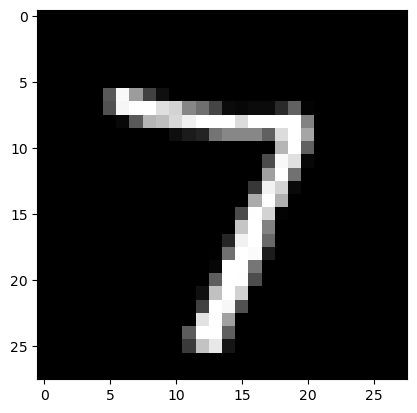

torch.Size([50000, 784])


In [253]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_valid[1500].reshape((28, 28)), cmap="gray")
# ``pyplot.show()`` only if not on Colab
try:
    import google.colab
except ImportError:
    pyplot.show()
print(x_train.shape)
